
#**Predicting Project Approval on DonorsChoose.org**
---
> The DonorsChoose.org portal receives a staggering number of classroom project proposals (hundreds of thousands!) each year. Manually reviewing each one by a large volunteer force is becoming unsustainable.

The **objective** is to streamline the screening process and ensure all proposals receive a fair and consistent review. This will help in freeing up volunteer time to focus on proposals that require more hands-on guidance.


---




***This is where you come in!***  

**Task ->** Your goal is to develop a system that predicts project approval based on the teacher's description, along with other details about the project, teacher, and school.


#####**Steps ->**
1. Data collection
2. Preprocessing and Exploration
3. Feature Engineering
4. Model Training
5. Evaluation
6. Analysis.



---




## **Step-1**: Data Collection

In [ ]:
# ## 1. Data Collection

# ### Import Libraries
# Import the necessary libraries for loading data and data manipulation
import os
import gdown
import zipfile
import pandas as pd
import numpy as np

# ### Download Dataset
# The dataset can be downloaded using the provided code. The data will be extracted into a specified directory.
dataset_url = "https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4"
dataset_path = "./dataset/donors_choose" # the dataset will be downloaded in this folder
zip_file_path = os.path.join(dataset_path, "donors_choose_dataset.zip")

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
if not os.path.exists(zip_file_path):
    gdown.download(dataset_url, zip_file_path, quiet=False)
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(dataset_path)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4
From (redirected): https://drive.google.com/uc?export=download&id=1KrnpfYRKVxGDnj-R2VZmNscEkR1zr2-4&confirm=t&uuid=b689e679-ecbf-48ad-92ec-2278a16a5784
To: /content/dataset/donors_choose/donors_choose_dataset.zip
100%|██████████| 111M/111M [00:03<00:00, 35.2MB/s]




---


### **Accessing the dataset**
To access the dataset, open the **Files** section by clicking the folder icon on the left pane; it should display the label 'Files' when you hover over it.

> Within the Files section, you will find a folder named dataset. Inside this folder, there is another folder called *donors_choose*.

> Within the donors_choose folder, you will find two CSV files:
1. train_data.csv
2. resources.csv

These two CSV files make up the dataset.




In [ ]:
# First, load the two CSV files into separate dataframes using pandas.
# Type your code below.

train_df = pd.read_csv('./dataset/donors_choose/train_data.csv')
resources_df = pd.read_csv('./dataset/donors_choose/resources.csv')

In [ ]:
train_df

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,38267,p048540,fadf72d6cd83ce6074f9be78a6fcd374,Mr.,MO,2016-06-17 12:02:31,Grades PreK-2,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Privacy Shields Help Promote Independent Thinking,Welcome to Mr. Ramos's 2nd grade classroom! We...,I would like to start preparing my second grad...,NaN,NaN,My students need these privacy partitions to h...,0,1
109244,169142,p166281,1984d915cc8b91aa16b4d1e6e39296c6,Ms.,NJ,2017-01-11 12:49:39,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Technology in Our Classroom,"Every morning, we start our day with our core ...","In this technological age, we need to give our...",NaN,NaN,My students need two iPad's and protective cas...,0,1
109245,143653,p155633,cdbfd04aa041dc6739e9e576b1fb1478,Mrs.,NJ,2016-08-25 17:11:32,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",2016/2017 Beginning of the Year Basics,This is a great group of sharing and caring st...,"My students learn about special events, holida...",NaN,NaN,My students need giant comfy pillows in order ...,3,1
109246,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1


In [ ]:
resources_df

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95
...,...,...,...,...
1541267,p031981,AmazonBasics 9 Volt Everyday Alkaline Batterie...,1,9.99
1541268,p031981,AmazonBasics AAA Performance Alkaline Batterie...,1,6.99
1541269,p031981,Black Electrical Tape (GIANT 3 PACK) Each Roll...,6,8.99
1541270,p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14




---

### **Step-2**: Preprocessing and Exploration.


Provide a summary of each dataframe, including its size, features, target variable, and data types.

In [ ]:
# Type the code here
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [ ]:
resources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [ ]:
# View the top few rows of each dataframe.
# Type the code here
train_df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
resources_df.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


#### **Understanding the Dataset**
We have included some additional information below to help you understand better.

The `train.csv` data set provided by DonorsChoose contains the following features -->

Feature | Description
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul>
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul>
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul>
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup>
**`project_essay_3`**    | Third application essay<sup>*</sup>
**`project_essay_4`**    | Fourth application essay<sup>*</sup>
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2`



---

**Notes on the Essay Data**

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>



---


Additionally, the `resources.csv` data set provides more data about the resources required for each project.

Feature | Description
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

---


#### **To predict (Output/Target Feature)**
The `train.csv` contains the following column (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.




---


#### Combine the two dataframes into a single dataframe by merging them on the project-ids

> **Note:** Each line in the resources.csv file represents a resource required by a project. Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project.

In [ ]:
# Type your code here
# .....
combined_df = pd.merge(train_df, resources_df, on='id')

In [ ]:
combined_df

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,description,quantity,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Alphabet Circus Rock and Learn DVD,3,14.59
1,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Getting Ready for Kindergarten DVD,3,14.59
2,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,LeapFrog Letter Factory DVD,3,14.98
3,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,LeapFrog Word Caper DVD,3,14.98
4,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Letter Sounds DVD,3,14.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650002,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1,AmazonBasics Balance Ball with Hand Pump - 65 cm,5,10.95
650003,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1,"Bed Risers, Adjustable Heavy Duty, 8 Piece Set...",1,19.99
650004,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1,"Big Joe Milano Chair, Stretch Limo Black",2,29.98
650005,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1,Purple Lap Tray,8,12.13




---
#### Identify and handle missing data appropriately.


In [ ]:
# Type your code here
# Fill (Impute) or drop missing values as appropriate
# .....
combined_df.isnull().sum()

,0
Unnamed: 0,0
id,0
teacher_id,0
teacher_prefix,8
school_state,0
project_submitted_datetime,0
project_grade_category,0
project_subject_categories,0
project_subject_subcategories,0
project_title,0




> Add blockquote



---


#### **Exploratory Data Analysis (EDA)**

Figure out the text, categorical and numerical columns. This information will be required for feature engineering.

In [ ]:
# Complete the code here
categorical_columns = combined_df.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_columns = combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
text_columns = combined_df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_columns

['id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_essay_3',
 'project_essay_4',
 'project_resource_summary',
 'description']

In [ ]:
numerical_columns

['Unnamed: 0',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'quantity',
 'price']

In [ ]:
text_columns

['id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_essay_3',
 'project_essay_4',
 'project_resource_summary',
 'description']

In [ ]:
# Plot the correlation matrix for numeric features.
# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

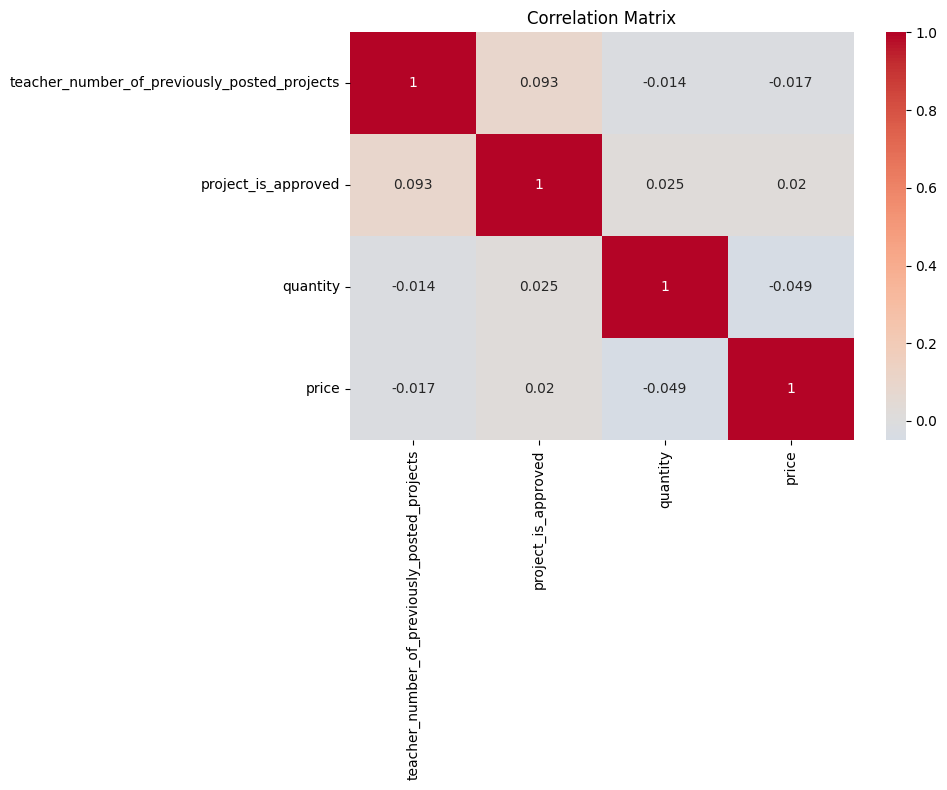

In [ ]:
# Compute correlation matrix
correlation_matrix = combined_df[numerical_columns].corr().drop('Unnamed: 0', axis=1).drop('Unnamed: 0', axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



###### *Analysing the approval rates*

**EDA-1**: What is the percentage (fraction) and number of projects that are approved versus not approved? Create a visualization of the results.
 - Pie (Donut) Chart

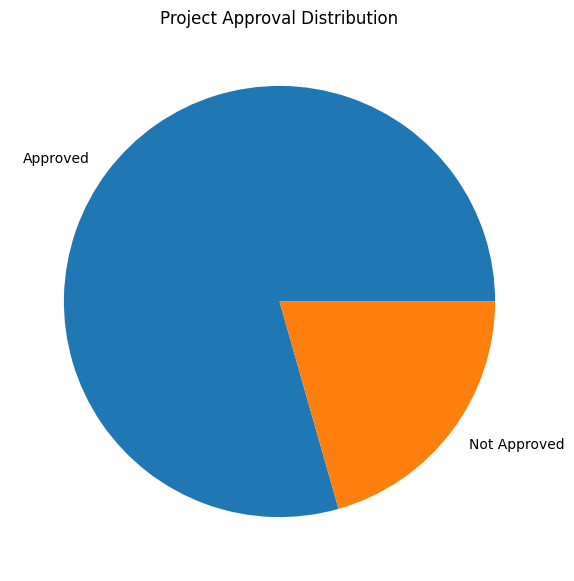

Total Projects: 650007
Approved Projects: 516203 (79.41%)
Not Approved Projects: 133804 (20.59%)


In [ ]:
# Calculate approval percentages
total_projects = len(combined_df)
approved_projects = combined_df[combined_df['project_is_approved'] == 1]
not_approved_projects = combined_df[combined_df['project_is_approved'] == 0]

approved_count = len(approved_projects)
not_approved_count = len(not_approved_projects)

approved_percentage = approved_count / total_projects * 100
not_approved_percentage = not_approved_count / total_projects * 100

# Create Donut Chart
plt.figure(figsize=(10, 7))
plt.pie([approved_count, not_approved_count],
        labels=['Approved', 'Not Approved'])
plt.title('Project Approval Distribution')
plt.show()

# Print detailed statistics
print(f"Total Projects: {total_projects}")
print(f"Approved Projects: {approved_count} ({approved_percentage:.2f}%)")
print(f"Not Approved Projects: {not_approved_count} ({not_approved_percentage:.2f}%)")

  

**EDA-2**: Analyse the approval rate per state. You can plot the approval rates for the top k states.
- With highest and lowest approval rates.

In [ ]:
# Group by state and calculate approval rates
state_approval_rates = combined_df.groupby('school_state')['project_is_approved'].mean().reset_index()
state_approval_rates.columns = ['state', 'approval_rate']
state_approval_rates['approval_rate'] *= 100  # Convert to percentage

state_approval_rates

,state,approval_rate
0,AK,75.687914
1,AL,77.158316
2,AR,76.678677
3,AZ,78.794055
4,CA,80.516505
5,CO,78.594797
6,CT,81.050016
7,DC,73.672864
8,DE,87.234043
9,FL,77.232576


In [ ]:
# Sort the states by approval rate
state_approval_rates_sorted = state_approval_rates.sort_values('approval_rate')

# Select top 10 lowest and highest approval rate states
lowest_states = state_approval_rates_sorted.head(10)
highest_states = state_approval_rates_sorted.tail(10)

<ipython-input-21-236e7d7bb374>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='approval_rate', data=highest_states,


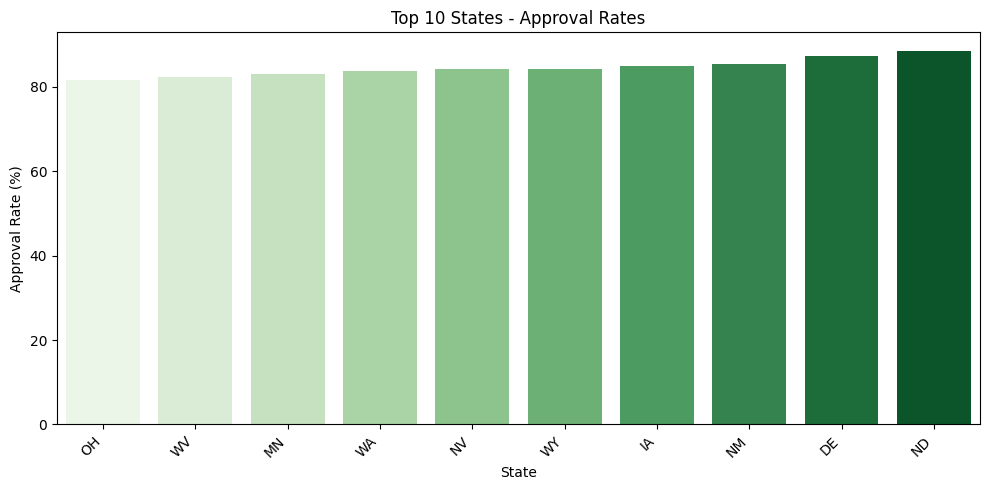

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x='state', y='approval_rate', data=highest_states,
            palette='Greens')
plt.title('Top 10 States - Approval Rates')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

<ipython-input-22-422a05cb221e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='approval_rate', data=lowest_states,


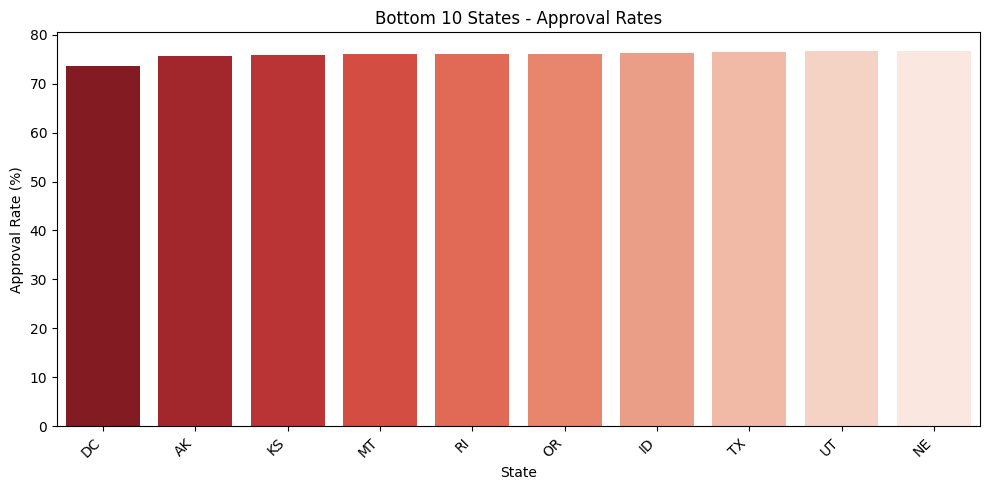

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x='state', y='approval_rate', data=lowest_states,
            palette='Reds_r')
plt.title('Bottom 10 States - Approval Rates')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

**EDA-3**: Analyse the approval rate per project_grade_category.
  - Plot a stacked bar chart showing the number of projects approved vs rejected for each category.

In [ ]:
# Group by project_grade_category and project_is_approved
grade_approval_counts = combined_df.groupby(['project_grade_category', 'project_is_approved']).size().unstack(fill_value=0)

# Calculate percentages
grade_approval_percentages = grade_approval_counts.div(grade_approval_counts.sum(axis=1), axis=0) * 100

In [ ]:
grade_approval_percentages

project_is_approved,0,1
project_grade_category,,
Grades 3-5,19.682788,80.317212
Grades 6-8,21.078949,78.921051
Grades 9-12,21.984370,78.015630
Grades PreK-2,20.800369,79.199631


In [ ]:
grade_approval_counts

project_is_approved,0,1
project_grade_category,,
Grades 3-5,42330,172731
Grades 6-8,20572,77023
Grades 9-12,13587,48216
Grades PreK-2,57315,218233


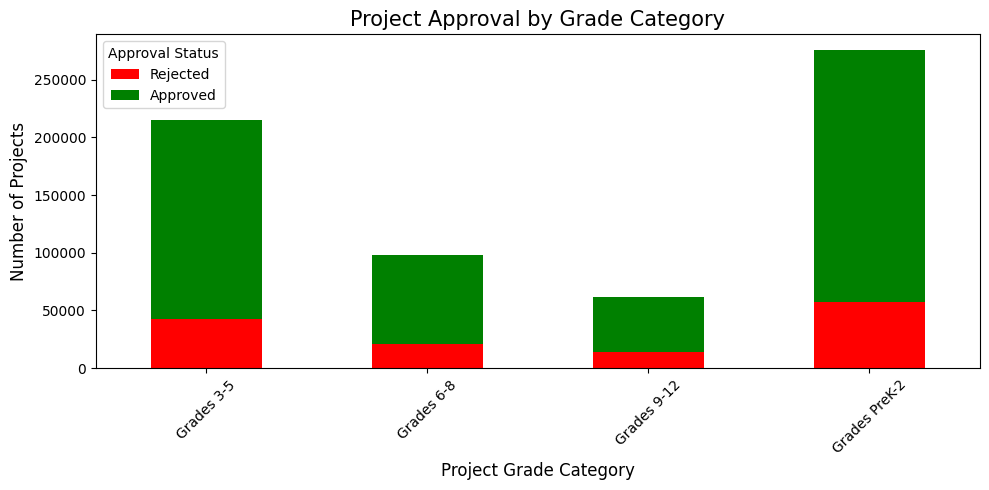

In [ ]:
# Create a stacked bar chart
plt.figure(figsize=(10, 5))

# Plot the stacked bar chart
grade_approval_counts.plot(kind='bar', stacked=True, ax=plt.gca(),
                            color=['red', 'green'])

plt.title('Project Approval by Grade Category', fontsize=15)
plt.xlabel('Project Grade Category', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.legend(['Rejected', 'Approved'], title='Approval Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**EDA-4**: Analyse the approval rate per project_subject_categories.
- Is the approval rate same for all categories?
- Do all categories have almost equal representation?
- Any skewness observed?

In [ ]:
# Split multi-category entries
combined_df['split_categories'] = combined_df['project_subject_categories'].str.split(', ')
exploded_df = combined_df.explode('split_categories')

# Calculate approval rates and project counts per subject category
subject_approval_analysis = exploded_df.groupby('split_categories').agg({
    'project_is_approved': ['mean', 'count']
}).reset_index()

# Flatten column names
subject_approval_analysis.columns = ['subject_category', 'approval_rate', 'total_projects']

# Calculate approval percentages
subject_approval_analysis['approval_rate_pct'] = subject_approval_analysis['approval_rate'] * 100

# Sort by total projects to see representation
subject_approval_analysis_sorted = subject_approval_analysis.sort_values('total_projects', ascending=False)

In [ ]:
subject_approval_analysis_sorted

,subject_category,approval_rate,total_projects,approval_rate_pct
4,Literacy & Language,0.826409,342241,82.640888
5,Math & Science,0.755205,196642,75.520489
7,Special Needs,0.751424,78845,75.142368
2,Health & Sports,0.797258,76886,79.725828
0,Applied Learning,0.754603,71806,75.460268
6,Music & The Arts,0.763785,64581,76.378501
3,History & Civics,0.822039,34648,82.203879
1,Care & Hunger,0.901136,11622,90.113578
8,Warmth,0.901136,11622,90.113578


<ipython-input-29-13039b94c0e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject_category', y='approval_rate_pct',
<ipython-input-29-13039b94c0e6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject_category', y='total_projects',


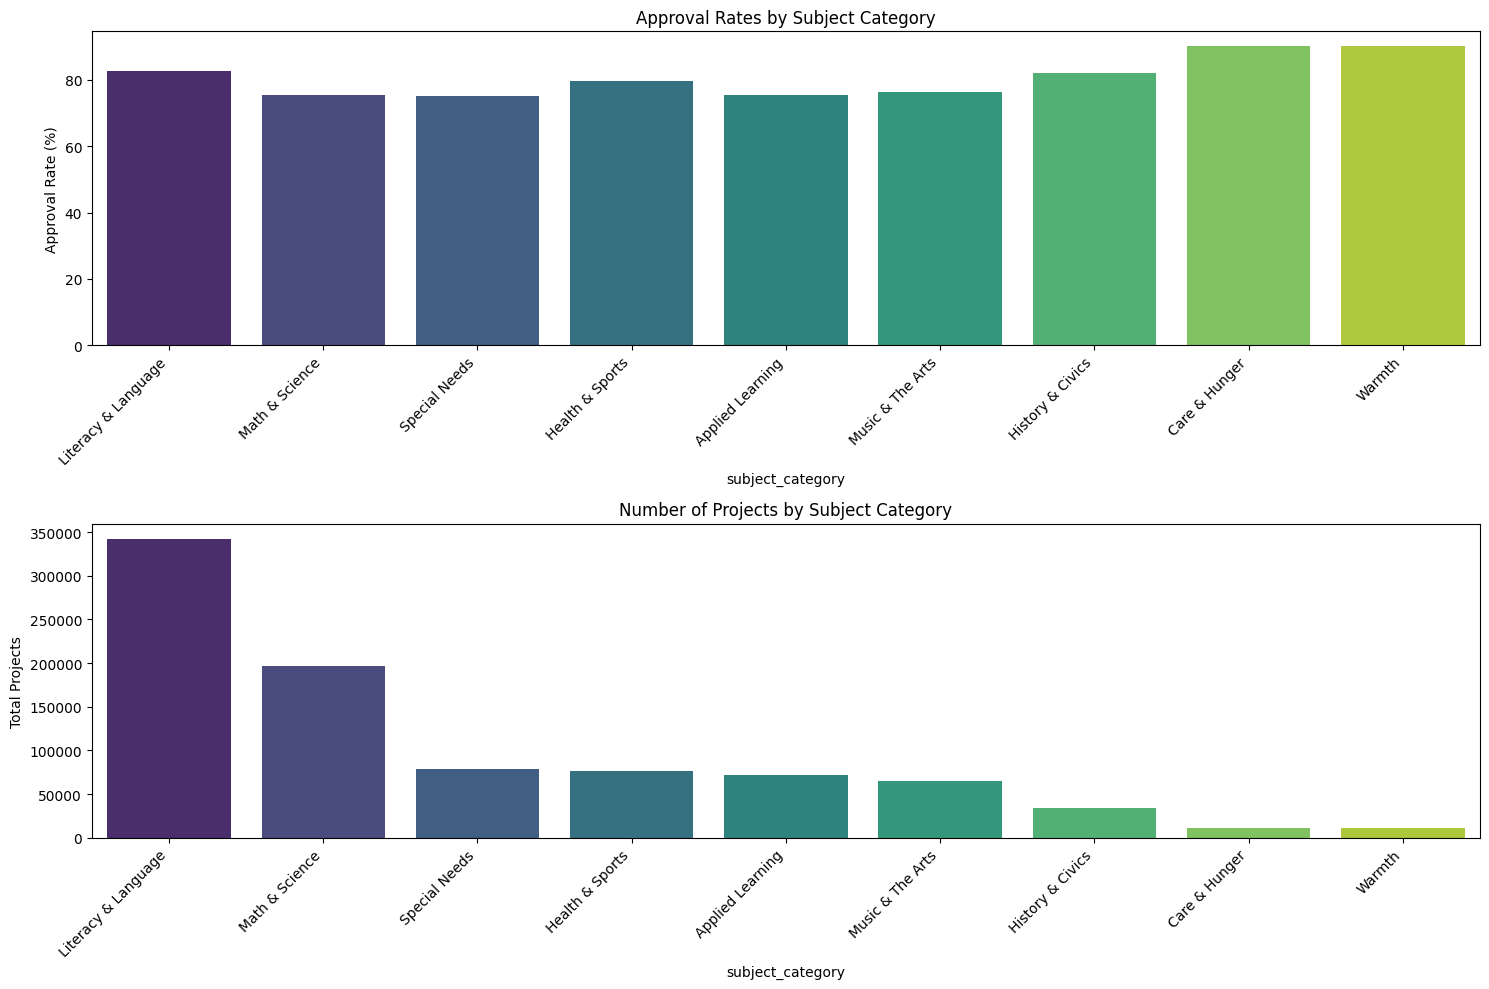

In [ ]:
# Visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Approval Rates
plt.subplot(2, 1, 1)
sns.barplot(x='subject_category', y='approval_rate_pct',
            data=subject_approval_analysis_sorted,
            palette='viridis')
plt.title('Approval Rates by Subject Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Approval Rate (%)')

# Subplot 2: Project Representation
plt.subplot(2, 1, 2)
sns.barplot(x='subject_category', y='total_projects',
            data=subject_approval_analysis_sorted,
            palette='viridis')
plt.title('Number of Projects by Subject Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Projects')

plt.tight_layout()
plt.show()

In [ ]:
# All categories are almost equal representation.

**EDA-5**: Is there any gender bias for approval?
  - Use the teacher_prefix column.

In [ ]:
# Analyze approval rates by teacher prefix (gender)
gender_approval_analysis = combined_df.groupby('teacher_prefix').agg({
    'project_is_approved': ['mean', 'count']
}).reset_index()

# Flatten column names
gender_approval_analysis.columns = ['teacher_prefix', 'approval_rate', 'total_projects']

In [ ]:
# Calculate approval percentages
gender_approval_analysis['approval_rate_pct'] = gender_approval_analysis['approval_rate'] * 100

# Sort by total projects
gender_approval_analysis_sorted = gender_approval_analysis.sort_values('total_projects', ascending=False)

# Print the analysis
print(gender_approval_analysis_sorted)

  teacher_prefix  approval_rate  total_projects  approval_rate_pct
2           Mrs.       0.801180          330012          80.117996
3            Ms.       0.788555          256823          78.855476
1            Mr.       0.793803           50704          79.380325
4        Teacher       0.725416           12386          72.541579
0            Dr.       0.581081              74          58.108108


<ipython-input-33-212e54dbbaea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='teacher_prefix', y='approval_rate_pct',
<ipython-input-33-212e54dbbaea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='teacher_prefix', y='total_projects',


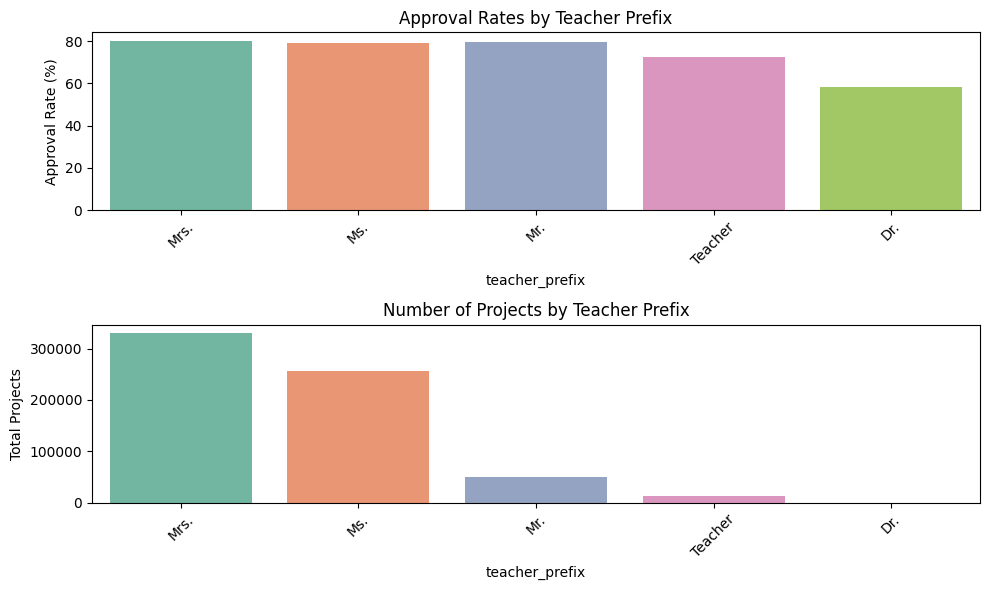

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))

# Subplot 1: Approval Rates
plt.subplot(2, 1, 1)
sns.barplot(x='teacher_prefix', y='approval_rate_pct',
            data=gender_approval_analysis_sorted,
            palette='Set2')
plt.title('Approval Rates by Teacher Prefix')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

# Subplot 2: Project Representation
plt.subplot(2, 1, 2)
sns.barplot(x='teacher_prefix', y='total_projects',
            data=gender_approval_analysis_sorted,
            palette='Set2')
plt.title('Number of Projects by Teacher Prefix')
plt.ylabel('Total Projects')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# There is no gender bias in regards to project approval rates.

**EDA-6**: whether the approval rate depends on the price and quantity of the resources?
- Provide descriptive statstics for approved & not-approved projects.
- with appropriate visualizations for a better understanding of the results

In [ ]:
# Descriptive statistics for price and quantity by approval status
resource_stats = combined_df.groupby('project_is_approved').agg({
    'price': ['mean', 'median', 'min', 'max', 'count'],
    'quantity': ['mean', 'median', 'min', 'max', 'count']
})

print("Descriptive Statistics for Resources by Approval Status:")
print(resource_stats)


Descriptive Statistics for Resources by Approval Status:
                         price                              quantity         \
                          mean median  min     max   count      mean median   
project_is_approved                                                           
0                    44.499891  16.96  0.0  9999.0  133804  2.496091    1.0   
1                    51.558551  14.95  0.0  9999.0  516203  2.943555    1.0   

                                      
                    min  max   count  
project_is_approved                   
0                     1  400  133804  
1                     1  800  516203  


**EDA-7**: Analyse the approval rate over time. Choose the most appropriate visualisation.

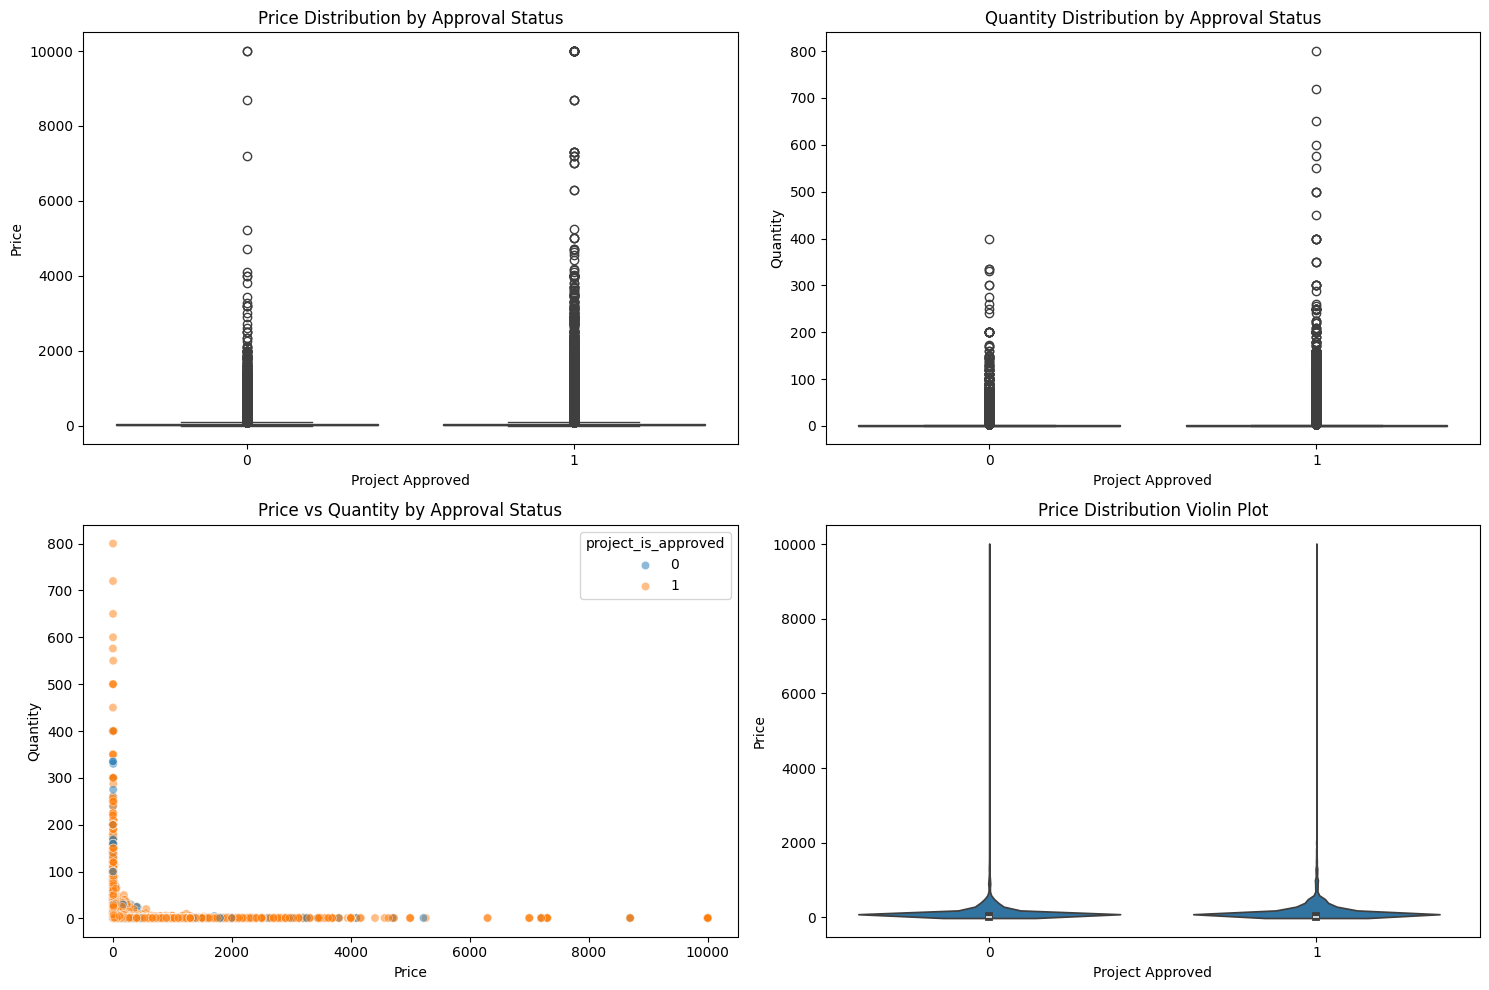

In [ ]:
# Prepare visualization
plt.figure(figsize=(15, 10))

# Boxplot for Price
plt.subplot(2, 2, 1)
sns.boxplot(x='project_is_approved', y='price', data=combined_df)
plt.title('Price Distribution by Approval Status')
plt.xlabel('Project Approved')
plt.ylabel('Price')

# Boxplot for Quantity
plt.subplot(2, 2, 2)
sns.boxplot(x='project_is_approved', y='quantity', data=combined_df)
plt.title('Quantity Distribution by Approval Status')
plt.xlabel('Project Approved')
plt.ylabel('Quantity')

# Scatter plot of Price vs Quantity, colored by approval status
plt.subplot(2, 2, 3)
sns.scatterplot(x='price', y='quantity', hue='project_is_approved',
                data=combined_df, alpha=0.5)
plt.title('Price vs Quantity by Approval Status')
plt.xlabel('Price')
plt.ylabel('Quantity')

# Violin plot for Price
plt.subplot(2, 2, 4)
sns.violinplot(x='project_is_approved', y='price', data=combined_df)
plt.title('Price Distribution Violin Plot')
plt.xlabel('Project Approved')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical test to check if there's a significant difference
from scipy import stats

# T-test for price
price_approved = combined_df[combined_df['project_is_approved'] == 1]['price']
price_not_approved = combined_df[combined_df['project_is_approved'] == 0]['price']
t_stat_price, p_value_price = stats.ttest_ind(price_approved, price_not_approved)

# T-test for quantity
quantity_approved = combined_df[combined_df['project_is_approved'] == 1]['quantity']
quantity_not_approved = combined_df[combined_df['project_is_approved'] == 0]['quantity']
t_stat_quantity, p_value_quantity = stats.ttest_ind(quantity_approved, quantity_not_approved)

print("\nStatistical Test Results:")
print(f"Price - T-statistic: {t_stat_price}, P-value: {p_value_price}")
print(f"Quantity - T-statistic: {t_stat_quantity}, P-value: {p_value_quantity}")


Statistical Test Results:
Price - T-statistic: 16.171095419396185, P-value: 8.28169177788498e-59
Quantity - T-statistic: 19.782186933916314, P-value: 4.4974398493011425e-87


<ipython-input-37-490bcf719236>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bin_approval = combined_df.groupby('price_bin')['project_is_approved'].mean()


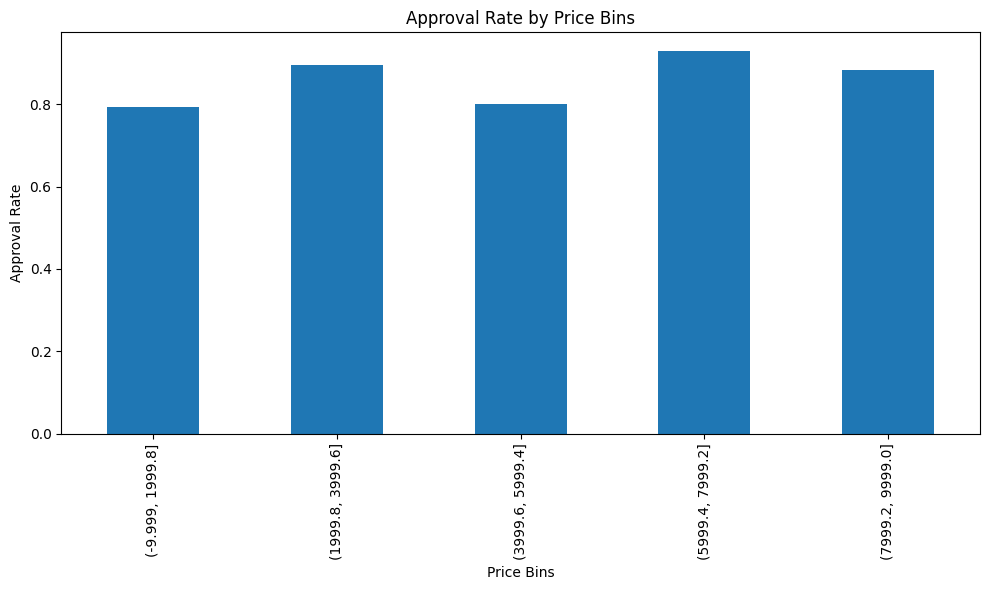

<ipython-input-37-490bcf719236>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_bin_approval = combined_df.groupby('quantity_bin')['project_is_approved'].mean()


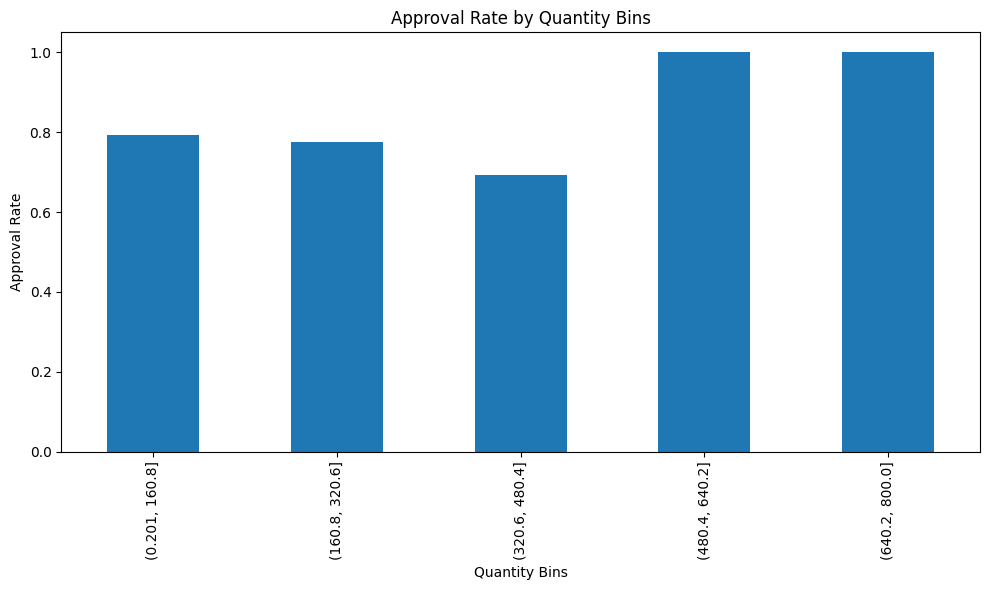

In [ ]:
# Calculate approval rate by price bins
combined_df['price_bin'] = pd.cut(combined_df['price'], bins=5)
price_bin_approval = combined_df.groupby('price_bin')['project_is_approved'].mean()

plt.figure(figsize=(10, 6))
price_bin_approval.plot(kind='bar')
plt.title('Approval Rate by Price Bins')
plt.xlabel('Price Bins')
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

# Calculate approval rate by quantity bins
combined_df['quantity_bin'] = pd.cut(combined_df['quantity'], bins=5)
quantity_bin_approval = combined_df.groupby('quantity_bin')['project_is_approved'].mean()

plt.figure(figsize=(10, 6))
quantity_bin_approval.plot(kind='bar')
plt.title('Approval Rate by Quantity Bins')
plt.xlabel('Quantity Bins')
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

**EDA-8**: Conduct further analysis to uncover patterns, anomalies, and relationships within the data.
- Summary statistics
- Distribution plots
- Correlation matrix (for numerical features)


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
# Select relevant numerical features
numerical_features = [
    'price',
    'quantity',
    'teacher_number_of_previously_posted_projects',
    'project_is_approved'
]

# Extract numerical columns
num_df = combined_df[numerical_features]

# 1. Summary Statistics
print("Comprehensive Summary Statistics:")
summary_stats = num_df.describe()
print(summary_stats)

# Detailed summary by approval status
approval_grouped_stats = num_df.groupby(num_df['project_is_approved']).describe()
print("\nSummary Statistics by Approval Status:")
print(approval_grouped_stats)

Comprehensive Summary Statistics:
               price       quantity  \
count  650007.000000  650007.000000   
mean       50.105525       2.851445   
std       142.316606       7.375642   
min         0.000000       1.000000   
25%         7.860000       1.000000   
50%        14.990000       1.000000   
75%        39.500000       2.000000   
max      9999.000000     800.000000   

       teacher_number_of_previously_posted_projects  project_is_approved  
count                                 650007.000000        650007.000000  
mean                                      12.396556             0.794150  
std                                       29.945793             0.404322  
min                                        0.000000             0.000000  
25%                                        0.000000             1.000000  
50%                                        3.000000             1.000000  
75%                                       10.000000             1.000000  
max           

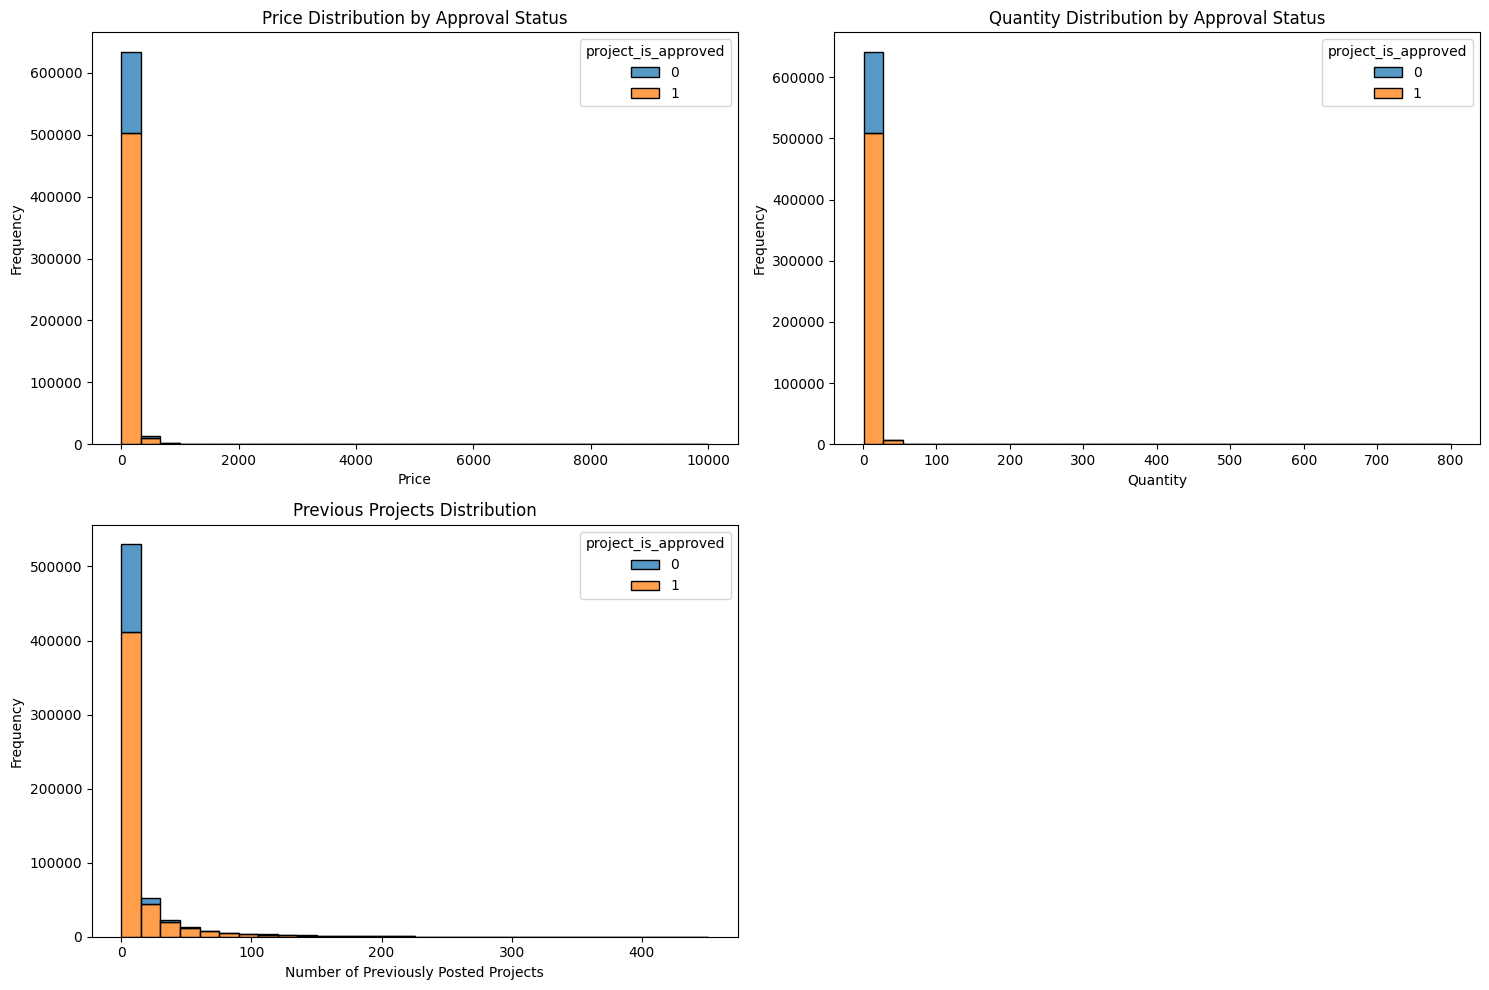

In [ ]:
# 2. Distribution Plots
plt.figure(figsize=(15, 10))

# Subplot for price distribution
plt.subplot(2, 2, 1)
sns.histplot(data=num_df, x='price', hue='project_is_approved',
             multiple="stack", bins=30)
plt.title('Price Distribution by Approval Status')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Subplot for quantity distribution
plt.subplot(2, 2, 2)
sns.histplot(data=num_df, x='quantity', hue='project_is_approved',
             multiple="stack", bins=30)
plt.title('Quantity Distribution by Approval Status')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Subplot for previously posted projects
plt.subplot(2, 2, 3)
sns.histplot(data=num_df, x='teacher_number_of_previously_posted_projects',
             hue='project_is_approved', multiple="stack", bins=30)
plt.title('Previous Projects Distribution')
plt.xlabel('Number of Previously Posted Projects')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


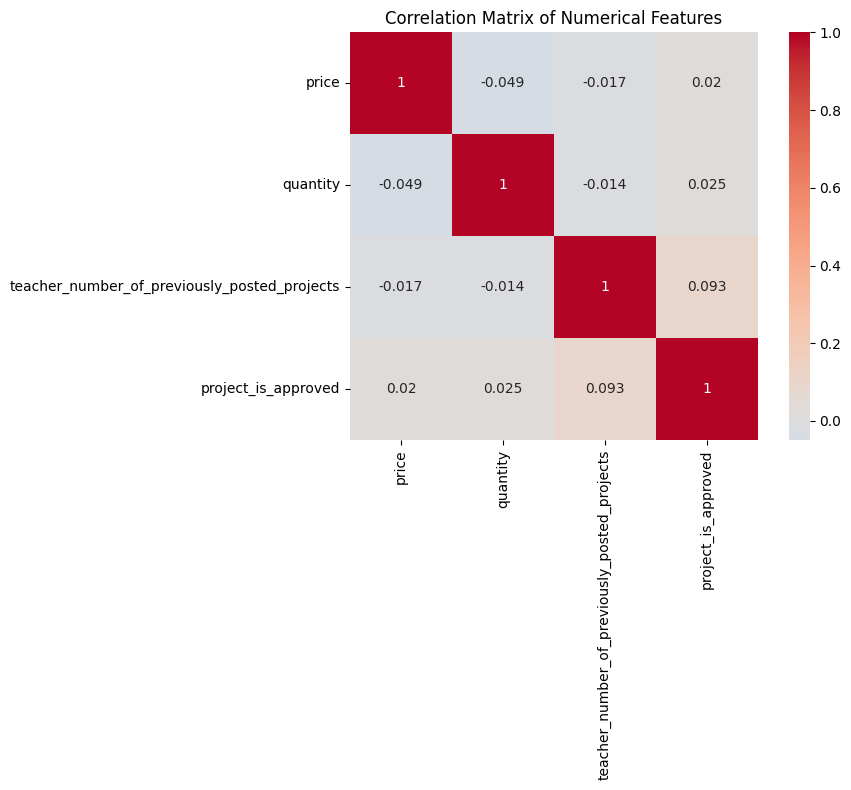

In [ ]:
# 3. Correlation Matrix
# Prepare correlation matrix
correlation_matrix = num_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

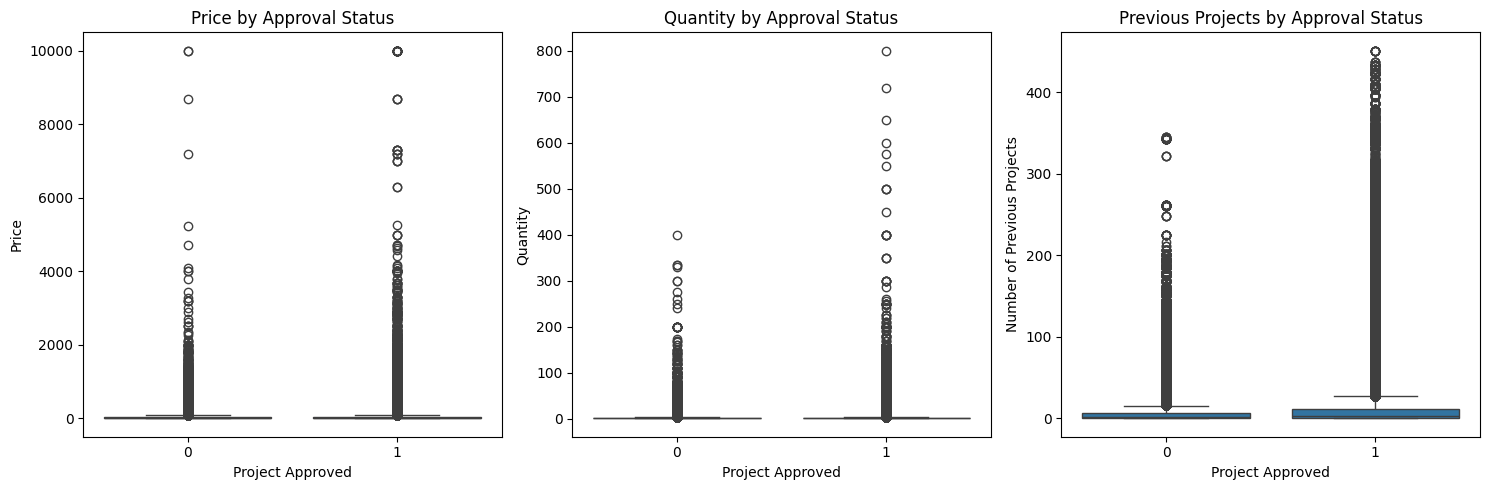

In [ ]:
# 4. Additional Insights - Box Plots
plt.figure(figsize=(15, 5))

# Price box plot
plt.subplot(1, 3, 1)
sns.boxplot(x='project_is_approved', y='price', data=combined_df)
plt.title('Price by Approval Status')
plt.xlabel('Project Approved')
plt.ylabel('Price')

# Quantity box plot
plt.subplot(1, 3, 2)
sns.boxplot(x='project_is_approved', y='quantity', data=combined_df)
plt.title('Quantity by Approval Status')
plt.xlabel('Project Approved')
plt.ylabel('Quantity')

# Previous projects box plot
plt.subplot(1, 3, 3)
sns.boxplot(x='project_is_approved',
            y='teacher_number_of_previously_posted_projects',
            data=combined_df)
plt.title('Previous Projects by Approval Status')
plt.xlabel('Project Approved')
plt.ylabel('Number of Previous Projects')

plt.tight_layout()
plt.show()


Outlier Analysis:

Outliers in price:
Total outliers: 82342
Percentage of outliers: 12.67%

Outliers in quantity:
Total outliers: 105017
Percentage of outliers: 16.16%

Outliers in teacher_number_of_previously_posted_projects:
Total outliers: 80407
Percentage of outliers: 12.37%


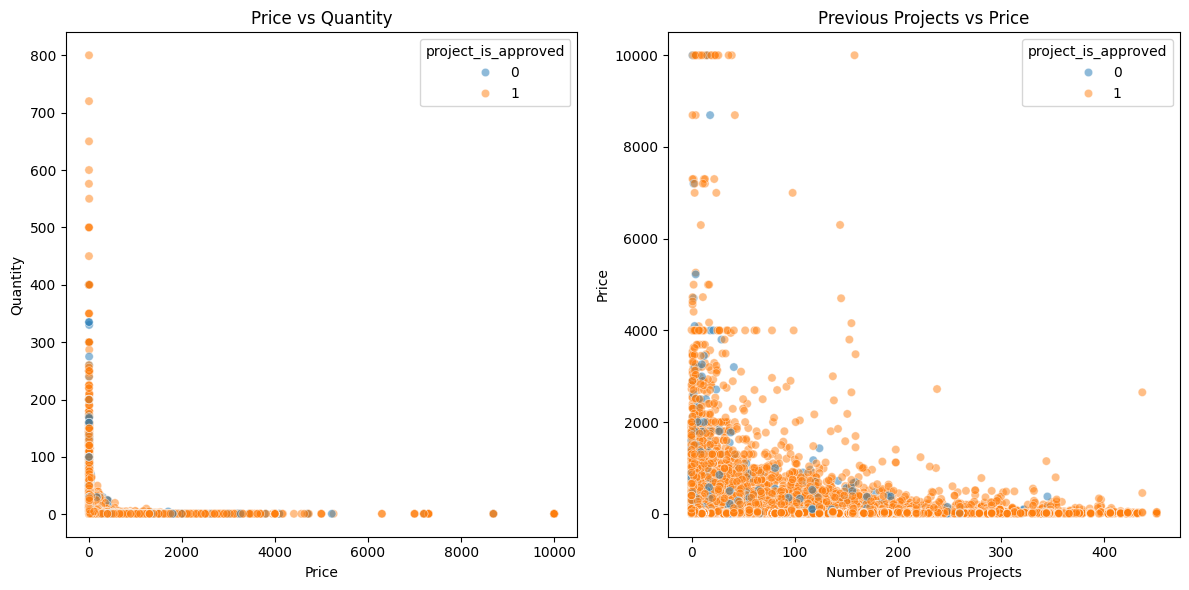

In [ ]:
# 5. Outlier Analysis
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\nOutlier Analysis:")
for feature in ['price', 'quantity', 'teacher_number_of_previously_posted_projects']:
    outliers = detect_outliers(combined_df, feature)
    print(f"\nOutliers in {feature}:")
    print(f"Total outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(combined_df) * 100:.2f}%")

# 6. Detailed Feature Relationships
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=combined_df, x='price', y='quantity',
                hue='project_is_approved', alpha=0.5)
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_df,
                x='teacher_number_of_previously_posted_projects',
                y='price', hue='project_is_approved', alpha=0.5)
plt.title('Previous Projects vs Price')
plt.xlabel('Number of Previous Projects')
plt.ylabel('Price')

plt.tight_layout()
plt.show()



---


**EDA-9**: Consider performing detailed analyses to help the organization identify projects that need closer scrutiny before approval, allowing volunteers to concentrate their efforts where they are most needed.
  - for instance, examining if there is a relation between the word count in titles or essay descriptions and approval rates
    - Explore Kernel Density Estimation (kde) plot
  - Examine whether higher-cost projects are more likely to be rejected
    - Compare the percentile trend for approved v/s rejected projects at different percentiles  
  - whether the approval rate depends on the number of prior projects posted by a teacher


<ipython-input-43-8625e9f0e999>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_wordcount_approval = combined_df.groupby('title_word_count_bin')['project_is_approved'].mean()
<ipython-input-43-8625e9f0e999>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  essay_wordcount_approval = combined_df.groupby('essay_word_count_bin')['project_is_approved'].mean()


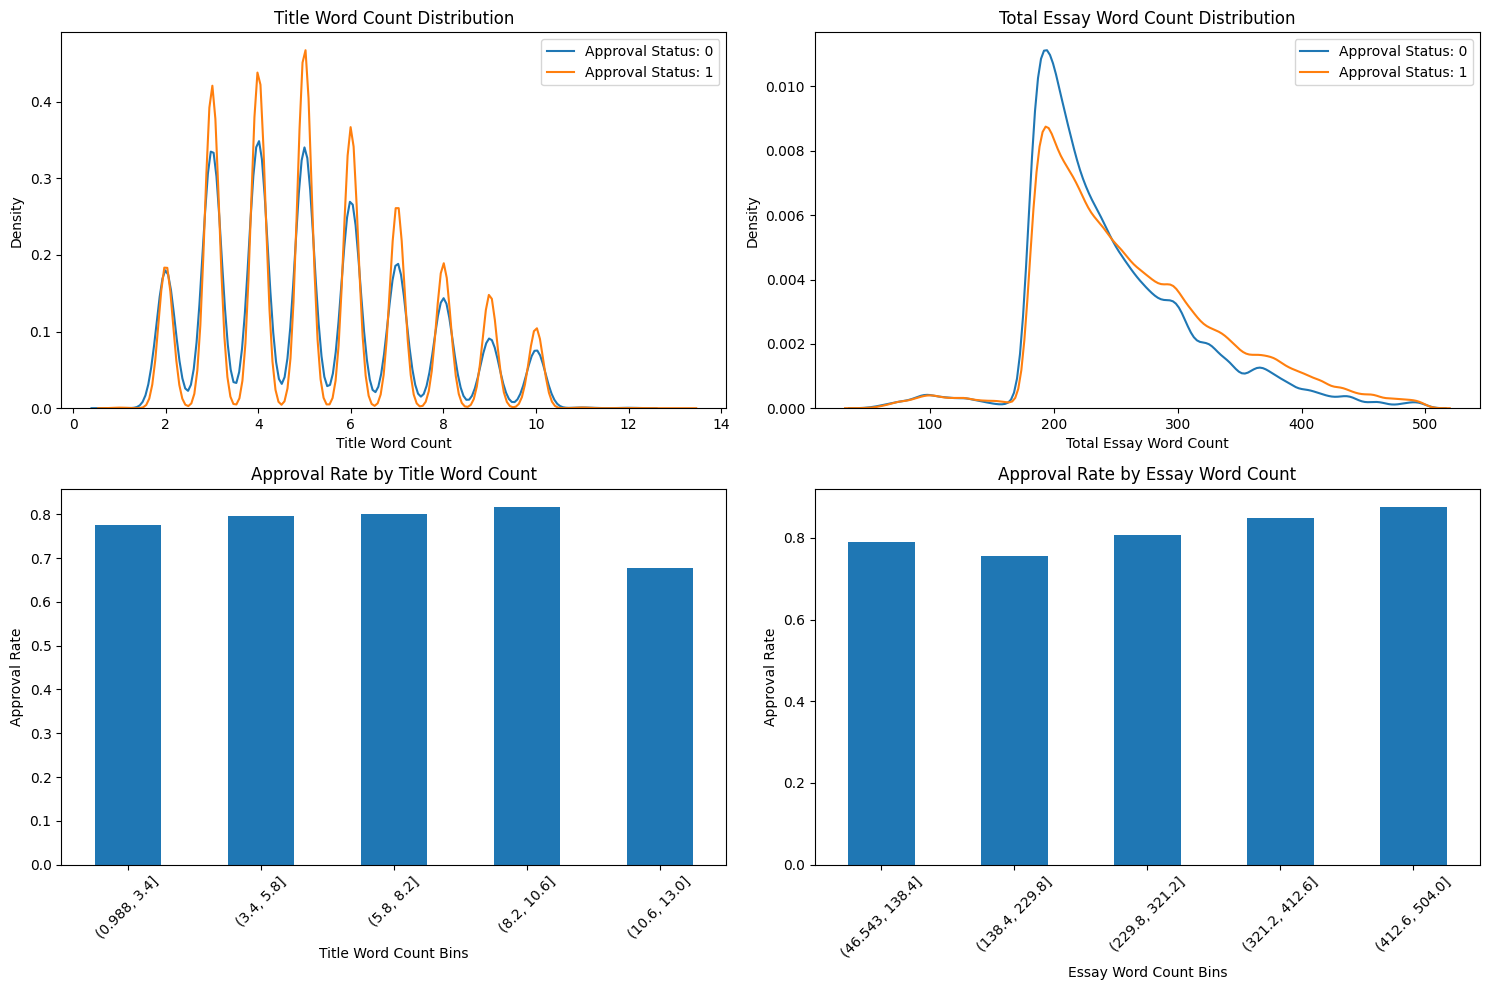


Statistical Test for title_word_count:
T-statistic: 23.331448033549794
P-value: 2.3842384849657046e-120

Statistical Test for total_essay_word_count:
T-statistic: 71.69059689157271
P-value: 0.0


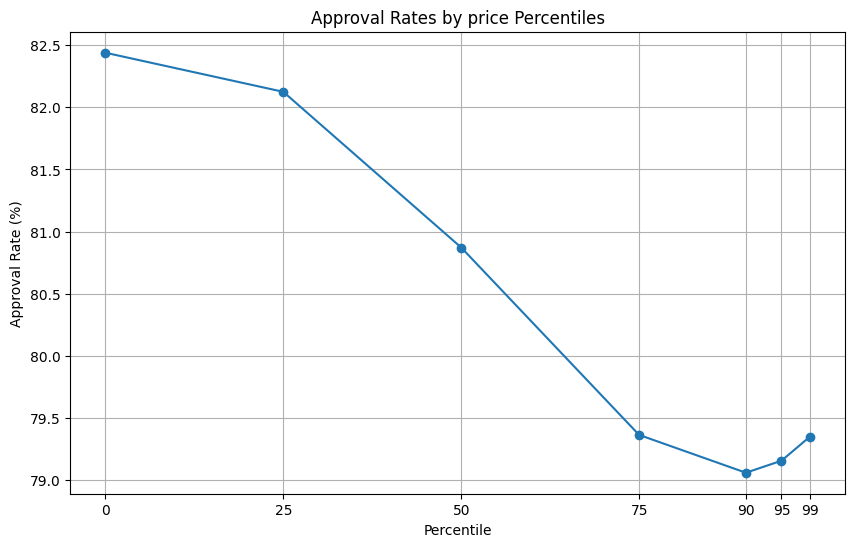


Price Percentile Approval Rates:
0th Percentile: 82.44%
25th Percentile: 82.12%
50th Percentile: 80.87%
75th Percentile: 79.36%
90th Percentile: 79.06%
95th Percentile: 79.16%
99th Percentile: 79.35%


<ipython-input-43-8625e9f0e999>:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prev_projects_approval = combined_df.groupby('previous_projects_bin')['project_is_approved'].mean()


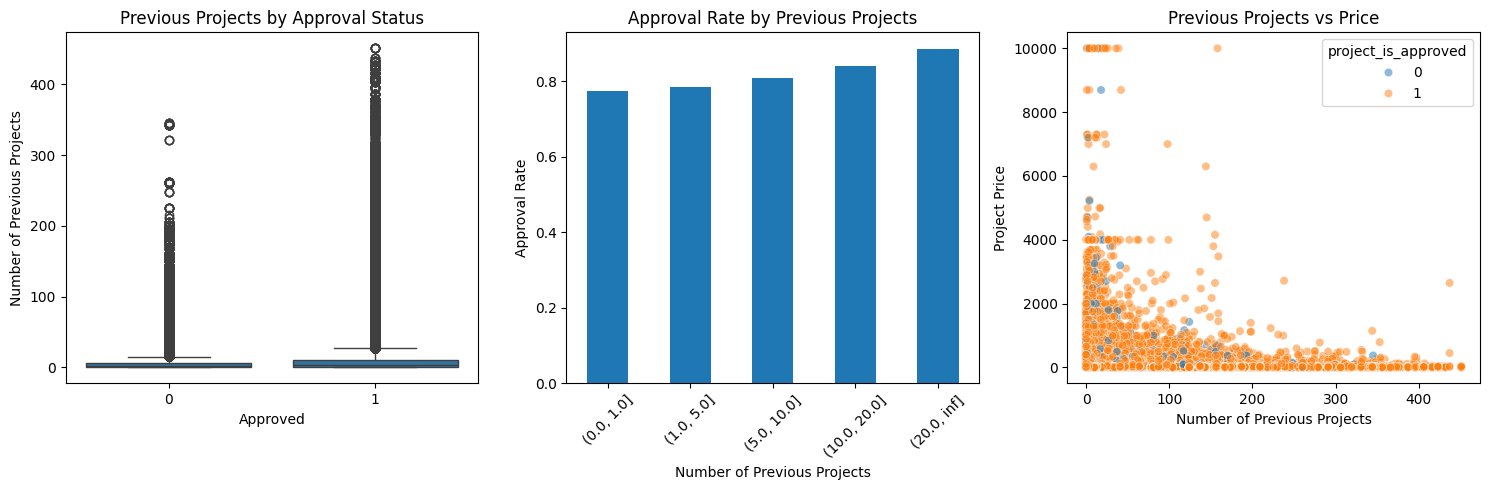


Previous Projects Statistical Test:
T-statistic: 75.1236573380599
P-value: 0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Word Count Analysis
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Add word count columns
combined_df['title_word_count'] = combined_df['project_title'].apply(count_words)
combined_df['essay1_word_count'] = combined_df['project_essay_1'].apply(count_words)
combined_df['essay2_word_count'] = combined_df['project_essay_2'].apply(count_words)
combined_df['total_essay_word_count'] = combined_df['essay1_word_count'] + combined_df['essay2_word_count']

# Word Count vs Approval Rate Analysis
plt.figure(figsize=(15, 10))

# Title Word Count KDE Plot
plt.subplot(2, 2, 1)
for approval in [0, 1]:
    sns.kdeplot(
        combined_df[combined_df['project_is_approved'] == approval]['title_word_count'],
        label=f'Approval Status: {approval}'
    )
plt.title('Title Word Count Distribution')
plt.xlabel('Title Word Count')
plt.ylabel('Density')
plt.legend()

# Total Essay Word Count KDE Plot
plt.subplot(2, 2, 2)
for approval in [0, 1]:
    sns.kdeplot(
        combined_df[combined_df['project_is_approved'] == approval]['total_essay_word_count'],
        label=f'Approval Status: {approval}'
    )
plt.title('Total Essay Word Count Distribution')
plt.xlabel('Total Essay Word Count')
plt.ylabel('Density')
plt.legend()

# Approval Rate by Word Count Bins
plt.subplot(2, 2, 3)
combined_df['title_word_count_bin'] = pd.cut(combined_df['title_word_count'], bins=5)
title_wordcount_approval = combined_df.groupby('title_word_count_bin')['project_is_approved'].mean()
title_wordcount_approval.plot(kind='bar')
plt.title('Approval Rate by Title Word Count')
plt.xlabel('Title Word Count Bins')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)

# Approval Rate by Essay Word Count Bins
plt.subplot(2, 2, 4)
combined_df['essay_word_count_bin'] = pd.cut(combined_df['total_essay_word_count'], bins=5)
essay_wordcount_approval = combined_df.groupby('essay_word_count_bin')['project_is_approved'].mean()
essay_wordcount_approval.plot(kind='bar')
plt.title('Approval Rate by Essay Word Count')
plt.xlabel('Essay Word Count Bins')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical Tests for Word Counts
def word_count_statistical_test(word_count_column):
    approved = combined_df[combined_df['project_is_approved'] == 1][word_count_column]
    not_approved = combined_df[combined_df['project_is_approved'] == 0][word_count_column]

    t_stat, p_value = stats.ttest_ind(approved, not_approved)
    print(f"\nStatistical Test for {word_count_column}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

word_count_statistical_test('title_word_count')
word_count_statistical_test('total_essay_word_count')

# 2. Project Cost Percentile Analysis
def percentile_analysis(column):
    # Create percentile bins
    percentiles = [0, 25, 50, 75, 90, 95, 99]

    # Initialize results dictionary
    approval_rates = {}

    # Calculate approval rates for each percentile
    for p in percentiles:
        # Get the threshold value for this percentile
        threshold = combined_df[column].quantile(p/100)

        # Filter dataframe
        percentile_df = combined_df[combined_df[column] <= threshold]

        # Calculate approval rate
        approval_rates[p] = percentile_df['project_is_approved'].mean() * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(list(approval_rates.keys()), list(approval_rates.values()), marker='o')
    plt.title(f'Approval Rates by {column} Percentiles')
    plt.xlabel('Percentile')
    plt.ylabel('Approval Rate (%)')
    plt.xticks(percentiles)
    plt.grid(True)
    plt.show()

    return approval_rates

# Percentile analysis for price
price_approval_rates = percentile_analysis('price')
print("\nPrice Percentile Approval Rates:")
for p, rate in price_approval_rates.items():
    print(f"{p}th Percentile: {rate:.2f}%")

# 3. Previous Projects Analysis
plt.figure(figsize=(15, 5))

# Boxplot of previous projects by approval status
plt.subplot(1, 3, 1)
sns.boxplot(x='project_is_approved', y='teacher_number_of_previously_posted_projects', data=combined_df)
plt.title('Previous Projects by Approval Status')
plt.xlabel('Approved')
plt.ylabel('Number of Previous Projects')

# Approval rate by previous project bins
plt.subplot(1, 3, 2)
combined_df['previous_projects_bin'] = pd.cut(
    combined_df['teacher_number_of_previously_posted_projects'],
    bins=[0, 1, 5, 10, 20, np.inf]
)
prev_projects_approval = combined_df.groupby('previous_projects_bin')['project_is_approved'].mean()
prev_projects_approval.plot(kind='bar')
plt.title('Approval Rate by Previous Projects')
plt.xlabel('Number of Previous Projects')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)

# Scatter plot of previous projects vs approval
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='teacher_number_of_previously_posted_projects',
    y='price',
    hue='project_is_approved',
    data=combined_df,
    alpha=0.5
)
plt.title('Previous Projects vs Price')
plt.xlabel('Number of Previous Projects')
plt.ylabel('Project Price')

plt.tight_layout()
plt.show()

# Statistical test for previous projects
prev_projects_approved = combined_df[combined_df['project_is_approved'] == 1]['teacher_number_of_previously_posted_projects']
prev_projects_not_approved = combined_df[combined_df['project_is_approved'] == 0]['teacher_number_of_previously_posted_projects']

t_stat, p_value = stats.ttest_ind(prev_projects_approved, prev_projects_not_approved)
print("\nPrevious Projects Statistical Test:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



---
### **Data Preprocessing for ML**
- Encoding Categorical Variables
> Convert categorical variables into numerical format using techniques like one-hot encoding.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Copy the dataframe to avoid modifying the original
preprocessed_df = combined_df.copy()

# 1. Handle Teacher Prefix (Gender-related column)
# Use Label Encoding
le_teacher_prefix = LabelEncoder()
preprocessed_df['teacher_prefix_encoded'] = le_teacher_prefix.fit_transform(preprocessed_df['teacher_prefix'].fillna('Unknown'))

# 2. Project Grade Category (Ordinal)
# Custom ordinal encoding based on grade levels
grade_order = {
    'Grades PreK-2': 0,
    'Grades 3-5': 1,
    'Grades 6-8': 2,
    'Grades 9-12': 3
}
preprocessed_df['project_grade_category_encoded'] = preprocessed_df['project_grade_category'].map(grade_order)

# 3. School State
# One-Hot Encoding for geographical categorical variable
state_dummies = pd.get_dummies(preprocessed_df['school_state'], prefix='state')
preprocessed_df = pd.concat([preprocessed_df, state_dummies], axis=1)

# 4. Multi-Label Subject Categories
# Custom multi-label encoding
def multi_label_encode(series):
    unique_categories = set()
    for categories in series.str.split(', '):
        unique_categories.update(categories)

    multi_label_dict = {cat: idx for idx, cat in enumerate(sorted(unique_categories))}

    def encode_categories(categories_str):
        categories = categories_str.split(', ')
        encoding = [0] * len(multi_label_dict)
        for cat in categories:
            encoding[multi_label_dict[cat]] = 1
        return encoding

    return series.apply(encode_categories), multi_label_dict

subject_encoded, subject_mapping = multi_label_encode(preprocessed_df['project_subject_categories'])
subject_encoded_df = pd.DataFrame(
    subject_encoded.tolist(),
    columns=[f'subject_{cat}' for cat in subject_mapping.keys()]
)
preprocessed_df = pd.concat([preprocessed_df, subject_encoded_df], axis=1)

# 5. Text Columns - Feature Engineering
# Add word count features (we already did this in previous analysis)
preprocessed_df['title_word_count'] = preprocessed_df['project_title'].apply(lambda x: len(str(x).split()))
preprocessed_df['essay1_word_count'] = preprocessed_df['project_essay_1'].apply(lambda x: len(str(x).split()))
preprocessed_df['essay2_word_count'] = preprocessed_df['project_essay_2'].apply(lambda x: len(str(x).split()))

# 6. Datetime Feature Engineering
preprocessed_df['project_submitted_datetime'] = pd.to_datetime(preprocessed_df['project_submitted_datetime'])
preprocessed_df['submitted_month'] = preprocessed_df['project_submitted_datetime'].dt.month
preprocessed_df['submitted_day_of_week'] = preprocessed_df['project_submitted_datetime'].dt.dayofweek
preprocessed_df['submitted_quarter'] = preprocessed_df['project_submitted_datetime'].dt.quarter

# 7. Numerical Feature Scaling (Optional, for ML models that require scaling)
from sklearn.preprocessing import StandardScaler

numerical_features = ['price', 'quantity', 'teacher_number_of_previously_posted_projects']
scaler = StandardScaler()
preprocessed_df[numerical_features] = scaler.fit_transform(preprocessed_df[numerical_features])

# Select final features for ML
ml_features = (
    ['teacher_prefix_encoded', 'project_grade_category_encoded'] +
    list(state_dummies.columns) +
    [f'subject_{cat}' for cat in subject_mapping.keys()] +
    ['title_word_count', 'essay1_word_count', 'essay2_word_count'] +
    ['submitted_month', 'submitted_day_of_week', 'submitted_quarter'] +
    numerical_features
)

# Final preprocessed dataframe for machine learning
X = preprocessed_df[ml_features]
y = preprocessed_df['project_is_approved']

print("Preprocessed Features Shape:", X.shape)
print("\nPreprocessed Features:")
print(X.columns.tolist())

Preprocessed Features Shape: (650007, 71)

Preprocessed Features:
['teacher_prefix_encoded', 'project_grade_category_encoded', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'subject_Applied Learning', 'subject_Care & Hunger', 'subject_Health & Sports', 'subject_History & Civics', 'subject_Literacy & Language', 'subject_Math & Science', 'subject_Music & The Arts', 'subject_Special Needs', 'subject_Warmth', 'title_word_count', 'essa

- Scale Numerical Features


In [ ]:
# Choose appropriate feature scaling for your ML models.
# Type your code here

# (Already done in the above cell).

---
# **Step-3**: Feature Engineering
- Feature Selection: Select the most relevant features for model training.
> Drop unneccessary text_columns.

Selected Features:
teacher_prefix_encoded
state_FL
state_NY
state_TX
state_WA
subject_Applied Learning
subject_Care & Hunger
subject_History & Civics
subject_Literacy & Language
subject_Math & Science
subject_Music & The Arts
subject_Special Needs
subject_Warmth
title_word_count
essay2_word_count
submitted_month
submitted_quarter
price
quantity
teacher_number_of_previously_posted_projects

Feature Importances:
                                         feature  importance
14                             essay2_word_count    0.247407
17                                         price    0.154340
19  teacher_number_of_previously_posted_projects    0.133253
13                              title_word_count    0.123137
15                               submitted_month    0.089164
0                         teacher_prefix_encoded    0.053725
18                                      quantity    0.045854
16                             submitted_quarter    0.025683
9                         subject_Mat

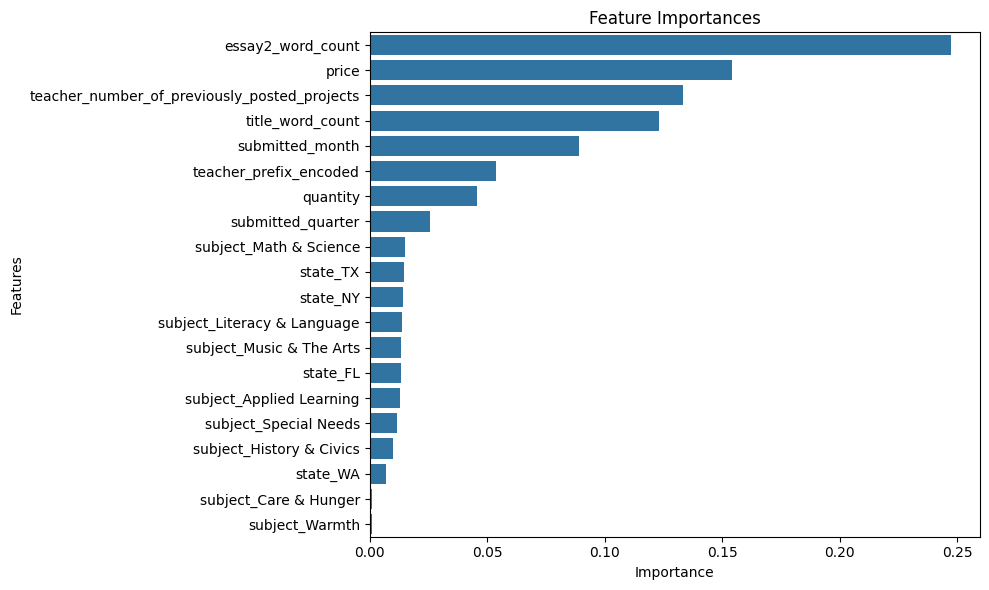


Final Feature Matrix Shape: (650007, 20)
Target Variable Shape: (650007,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Copy the preprocessed dataframe
feature_selected_df = preprocessed_df.copy()

# Define the target variable
y = feature_selected_df['project_is_approved']

# Select features for initial feature selection
initial_features = ml_features.copy()

# Create the feature matrix X
X = feature_selected_df[initial_features]

# Perform feature selection using SelectKBest
# We'll select the top 20 features
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = [initial_features[i] for i in selected_feature_indices]

print("Selected Features:")
for feature in selected_features:
    print(feature)

# Create a new dataframe with only the selected features
X_final = X[selected_features]

# Additional feature importance analysis
from sklearn.ensemble import RandomForestClassifier

# Random Forest Feature Importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_final, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_classifier.feature_importances_
})

# Sort features by importance
feature_importances_sorted = feature_importances.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances_sorted)

# Visualization of feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_sorted)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Prepare final dataset for model training
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)

print("\nFinal Feature Matrix Shape:", X_final.shape)
print("Target Variable Shape:", y.shape)



---


#### **Dealing with text data**

Raw text often presents several challenges. Some of them include:

- **Noise and Irrelevant Information**: Raw text can include extraneous information that may not be useful for analysis or modeling.

- **Inconsistent Formatting**: Text data can vary in format, which makes it difficult to standardize and process.

- **Spelling and Grammar Errors**: Errors in spelling, grammar, and punctuation can affect the quality of text analysis and processing.

- **High Dimensionality**: Text data can be high-dimensional due to the large number of unique words or terms, complicating analysis and modeling.

- **Language Variability**: Variations in language usage, slang, or domain-specific terminology can impact the consistency and effectiveness of text analysis.


**Text Preprocessing**:
- Let's clean the text to improve the quality of data
  
  - Decontracting text, removing escape sequences, special characters and stop words

  - You can use two popular libraries to handle text data.
    1. Natural Language ToolKit (nltk)
    2. Regular Expressions (re)

To help you prepare your text for analysis, we have included some basic functions for cleaning and normalization. Use these functions as a starting point and tailor them to achieve optimal text quality.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Decontracting text involves expanding contractions into their full forms.
def decontract_text(text):

    # decontract text

    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    return text

# Escape sequences are special character combinations used to represent characters that cannot be directly represented.
# These often need to be removed for text processing.

def remove_escape_sequences(text):

    # remove escape sequences

    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\n', ' ')

    return text


# Remove special characters using regular expressions.
# Special characters are characters that are not letters or numbers.
# These often include punctuation, symbols, and control characters.

def remove_special_characters(text):
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text


# Stop words are common words that often carry little semantic meaning (e.g., "the," "and," "is").
# Removing them can help focus on the more important words in the text.
def remove_stop_words(text):

        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
        #with no lower case conversion
        filtered_sentence = []
        for w in word_tokens:
                if w not in stop_words:
                        filtered_sentence.append(w)
        return filtered_sentence


def preprocess_text(text):

  text = decontract_text(text)
  text = remove_escape_sequences(text)
  text = remove_special_characters(text)
  text = remove_stop_words(text)

  text = ' '.join(text)

  return text.lower().strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Select first 100 rows
preprocessed_df_sample = preprocessed_df.head(100)

# Perform text cleaning steps on text columns for the sample
preprocessed_df_sample['project_title_cleaned'] = preprocessed_df_sample['project_title'].apply(preprocess_text)
preprocessed_df_sample['project_essay_1_cleaned'] = preprocessed_df_sample['project_essay_1'].apply(preprocess_text)
preprocessed_df_sample['project_essay_2_cleaned'] = preprocessed_df_sample['project_essay_2'].apply(preprocess_text)

# Optional: Print sample of cleaned text to verify preprocessing
print("Sample of Cleaned Project Titles:")
print(preprocessed_df_sample['project_title_cleaned'].head())

print("\nSample of Cleaned Essay 1:")
print(preprocessed_df_sample['project_essay_1_cleaned'].head())

Sample of Cleaned Project Titles:
0    educational support english learners home
1    educational support english learners home
2    educational support english learners home
3    educational support english learners home
4    educational support english learners home
Name: project_title_cleaned, dtype: object

Sample of Cleaned Essay 1:
0    my students english learners working english s...
1    my students english learners working english s...
2    my students english learners working english s...
3    my students english learners working english s...
4    my students english learners working english s...
Name: project_essay_1_cleaned, dtype: object


<ipython-input-47-693b6b1cce23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df_sample['project_title_cleaned'] = preprocessed_df_sample['project_title'].apply(preprocess_text)
<ipython-input-47-693b6b1cce23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df_sample['project_essay_1_cleaned'] = preprocessed_df_sample['project_essay_1'].apply(preprocess_text)
<ipython-input-47-693b6b1cce23>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Feel free to exlore other Python libraries that can help you improve the text quality.

---

# **Text Features as Bag of Words (BoW)**

- Machine Learning models can't work on plain English text. We need to convert this text into a structured format with numbers.

  - How can we turn text into numbers? This is where the Bag of Words method comes in. In BoW, each text feature (like a sentence or paragraph) is treated as a collection of words.
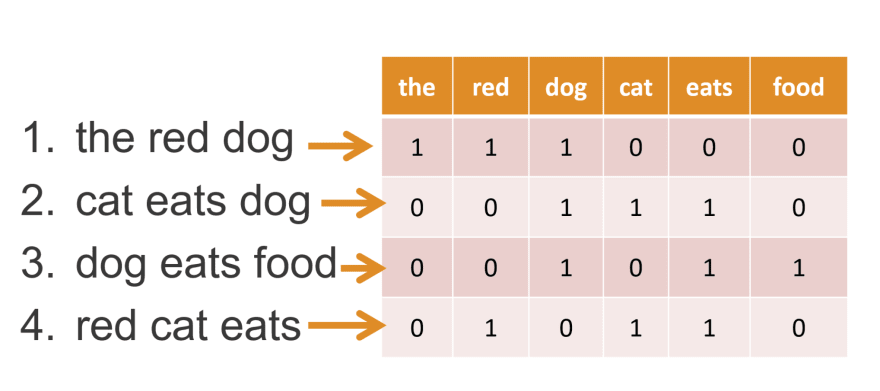

- **Creating the Vocabulary**:
  - The BoW model will first create a list of all unique words across all your text features.

- **Counting Word Frequencies**:
  - For each text feature, the BoW model counts the occurrences of each word from the vocabulary.

- **Building Feature Vectors**:
  - These word counts are then used to build feature vectors for each text feature, which can be used as input for your machine learning models.




Since we have multiple text columns, combining descriptive and summary text from the relevant `text_columns` can provide the following benefits:

  - **Dimensionality Reduction**: By combining multiple text columns into a single feature, you can reduce the dimensionality of your dataset. This can simplify the model and reduce the risk of overfitting.

  - **Improved Feature Representation**: It can create more informative features by capturing the full context of the text data, potentially improving the accuracy of your models.

  - **Easier Preprocessing**: Streamlining the text data into fewer columns can make preprocessing steps like tokenization, vectorization, and embedding more straightforward.

  - **Enhanced Interpretability**: Combining text features can make it easier to interpret the results of your model, as the feature represents a more holistic view of the data.

In [ ]:
# Concatenate text from project title and essays into a single column
preprocessed_df_sample['combined_text'] = (
    preprocessed_df_sample['project_title'].fillna('') + ' ' +
    preprocessed_df_sample['project_essay_1'].fillna('') + ' ' +
    preprocessed_df_sample['project_essay_2'].fillna('')
)

# Clean the combined text using the preprocessing function
preprocessed_df_sample['combined_text_cleaned'] = preprocessed_df_sample['combined_text'].apply(preprocess_text)

# Optional: Print sample to verify concatenation
print("Sample of Combined Text:")
print(preprocessed_df_sample['combined_text'].head())

print("\nSample of Cleaned Combined Text:")
print(preprocessed_df_sample['combined_text_cleaned'].head())

Sample of Combined Text:
0    Educational Support for English Learners at Ho...
1    Educational Support for English Learners at Ho...
2    Educational Support for English Learners at Ho...
3    Educational Support for English Learners at Ho...
4    Educational Support for English Learners at Ho...
Name: combined_text, dtype: object

Sample of Cleaned Combined Text:
0    educational support english learners home my s...
1    educational support english learners home my s...
2    educational support english learners home my s...
3    educational support english learners home my s...
4    educational support english learners home my s...
Name: combined_text_cleaned, dtype: object


<ipython-input-48-d4048c7c7c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df_sample['combined_text'] = (
<ipython-input-48-d4048c7c7c16>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df_sample['combined_text_cleaned'] = preprocessed_df_sample['combined_text'].apply(preprocess_text)




---


**Steps to Create a Bag-of-Words Representation**



Document-Term Matrix Shape: (100, 507)

Number of Features: 507

Top 10 Most Frequent Words:
reading        182
scholars       168
want           144
soccer         138
work           110
time           108
recess         107
classroom      100
grade           99
opportunity     99
dtype: int64


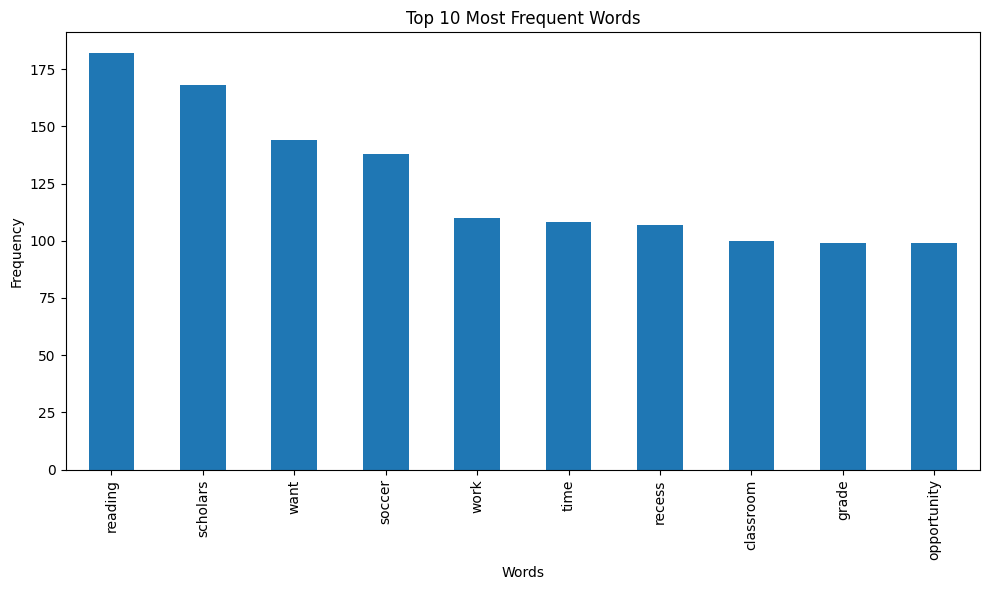

In [ ]:
# Import necessary library
# Use sklearn.feature_extraction.text for the CountVectorizer class.
# Your code here

# Instantiate a CountVectorizer Object
# Your code here

# Use the fit_transform method on your text data.
# This creates a document-term matrix where rows represent documents and columns represent words.
# Your code here

# Examine the Output
# The output is a sparse matrix. You can convert it to a dense matrix or DataFrame for easier manipulation.
# Your code here

# Import necessary library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer Object
# Set parameters to control the vectorization process
count_vectorizer = CountVectorizer(
    max_features=1000,  # Limit to top 1000 most frequent words
    stop_words='english',  # Remove English stop words
    lowercase=True,  # Convert all text to lowercase
    max_df=0.7,  # Ignore terms that appear in more than 70% of documents
    min_df=5  # Ignore terms that appear in fewer than 5 documents
)

# Use the fit_transform method on your preprocessed text data
# Use the cleaned combined text column
document_term_matrix = count_vectorizer.fit_transform(preprocessed_df_sample['combined_text_cleaned'])

# Convert to DataFrame for easier examination
# Get feature names (words)
feature_names = count_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense DataFrame
document_term_df = pd.DataFrame(
    document_term_matrix.toarray(),
    columns=feature_names
)

# Print basic information about the document-term matrix
print("Document-Term Matrix Shape:", document_term_matrix.shape)
print("\nNumber of Features:", len(feature_names))

# Optional: Display top 10 most frequent words
word_frequencies = document_term_df.sum()
top_words = word_frequencies.nlargest(10)
print("\nTop 10 Most Frequent Words:")
print(top_words)

# Optional: Visualize word distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Text Features - Bag of Words for cleaned text columns
bow_vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 features
title_bow = bow_vectorizer.fit_transform(preprocessed_df_sample['project_title_cleaned'])
essay1_bow = bow_vectorizer.fit_transform(preprocessed_df_sample['project_essay_1_cleaned'])
essay2_bow = bow_vectorizer.fit_transform(preprocessed_df_sample['project_essay_2_cleaned'])

# Convert sparse matrices to DataFrame
title_bow_df = pd.DataFrame(title_bow.toarray(), columns=[f'title_bow_{i}' for i in range(title_bow.shape[1])])
essay1_bow_df = pd.DataFrame(essay1_bow.toarray(), columns=[f'essay1_bow_{i}' for i in range(essay1_bow.shape[1])])
essay2_bow_df = pd.DataFrame(essay2_bow.toarray(), columns=[f'essay2_bow_{i}' for i in range(essay2_bow.shape[1])])

# 2. Use the previously selected features
# Use X_final for the sample dataset
X_selected = X_final.head(100)  # Use only first 100 rows

# 3. Concatenate all features
X = pd.concat([
    X_selected,  # Selected important features from previous step
    title_bow_df,  # BoW for project title
    essay1_bow_df,  # BoW for essay 1
    essay2_bow_df   # BoW for essay 2
], axis=1)

# Target variable
y = preprocessed_df_sample['project_is_approved']

print("Final Feature Matrix Shape:", X.shape)
print("Target Variable Shape:", y.shape)

Final Feature Matrix Shape: (100, 287)
Target Variable Shape: (100,)


---

Let's split the combined dataframe into the following partitions: `train`, `validation`, and `test`.

**Note**: Given the significant number of samples and the nature of the dataset, training the ML models would be time-consuming. Accordingly, decide on an appropriate fraction to use for each partition.

- Further, due to the significant imbalance in the data, where class "1" is overrepresented compared to class "0," you have two primary options:

  - **Undersampling**: Reduce the data imbalance by selecting all instances from the minority class (class "0") and randomly selecting an equal number of instances from the majority class (class "1").

  - **Oversampling**: Increase the representation of the minority class by techniques like Random Oversampling or SMOTE to balance the dataset.

Choosing the appropriate method is crucial. It depends on various factors and the specific requirements of your model.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,          # Feature matrix
    y,          # Target variable
    test_size=0.2,    # 20% of data for testing, 80% for training
    random_state=42   # Ensure reproducibility
)

# Print the shapes of the resulting sets
print("Training Feature Matrix Shape:", X_train.shape)
print("Testing Feature Matrix Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Feature Matrix Shape: (80, 287)
Testing Feature Matrix Shape: (20, 287)
Training Target Shape: (80,)
Testing Target Shape: (20,)




---


**Step-4**: Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize Logistic Regression model
# Use key parameters to improve model performance
logistic_model = LogisticRegression(
    random_state=42,      # For reproducibility
    max_iter=5,        # Increase max iterations to ensure convergence
    penalty='l2',         # L2 regularization (default)
    C=1.0,                # Inverse of regularization strength
    solver='lbfgs'        # Efficient solver for multi-class classification
)

# Fit the model on training data
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Probability predictions
y_pred_proba = logistic_model.predict_proba(X_test)

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(logistic_model.coef_[0])
})
feature_importance_sorted = feature_importance.sort_values('importance', ascending=False)


Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        12

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix:
[[ 7  1]
 [ 0 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter search space
param_distributions = {
    # Regularization strength (inverse)
    'C': loguniform(1e-4, 1e4),

    # Regularization type
    'penalty': ['l1', 'l2'],

    # Solver algorithm
    'solver': ['liblinear', 'saga'],

    # Class weighting
    'class_weight': [None, 'balanced'],

    # Multi-class strategy
    'multi_class': ['ovr', 'multinomial']
}

# Initialize the base model
base_model = LogisticRegression(random_state=42, max_iter=1000)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=50,           # Number of parameter settings sampled
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Metric to evaluate models
    random_state=42,
    n_jobs=-1            # Use all available cores
)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Best model details
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Get the best model
best_logistic_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_logistic_model.predict(X_test)
y_pred_proba = best_logistic_model.predict_proba(X_test)

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_multi_class(multi_class, solver, len(self.classes_

Best Hyperparameters: {'C': 46.19347374377384, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Score: 0.9875

Test Set Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




---

**Step-5**: Model Evaluation

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Probability predictions
y_pred_proba = logistic_model.predict_proba(X_test)

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(logistic_model.coef_[0])
})
feature_importance_sorted = feature_importance.sort_values('importance', ascending=False)


Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        12

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix:
[[ 7  1]
 [ 0 12]]


In [ ]:
# Ensemble Methods: Bagging and Boosting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bagging: Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=5,    # Number of trees in the forest
    random_state=42,     # Reproducibility
    max_depth=None,      # Full depth trees
    min_samples_split=2, # Minimum samples to split an internal node
    min_samples_leaf=1,  # Minimum samples in a leaf node
)

# Fit Random Forest
rf_classifier.fit(X_train, y_train)

# Predictions
rf_pred = rf_classifier.predict(X_test)

# Random Forest Evaluation
print("Random Forest (Bagging) Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest (Bagging) Results:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
# 2. Boosting: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=5,    # Number of boosting stages
    learning_rate=0.1,   # Shrinks the contribution of each tree
    max_depth=3,         # Maximum depth of individual trees
    random_state=42,     # Reproducibility
    subsample=0.8,       # Fraction of samples used for fitting individual trees
    min_samples_split=2, # Minimum samples to split an internal node
    min_samples_leaf=1   # Minimum samples in a leaf node
)

# Fit Gradient Boosting
gb_classifier.fit(X_train, y_train)

# Predictions
gb_pred = gb_classifier.predict(X_test)

# Gradient Boosting Evaluation
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))


Gradient Boosting Results:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Step 6**: Summarize the results and provide insights based on the model's performance.


# Your observations here!
---
logistic Regression (step5)
model Accuracy is 0.95
for class 0
f1score :0.93
for class1
f1 score:0.96

for class 0
confussion matrix -7 True positive and 1 false positive
 for class 1
 12 true positive
 no false negative
 (bagging )Random forest:
 accuaracy is 0.95
 (boosting )Gradient boosting :
 Accuarcy :1.0
 (overfitty since less samples are considered so its easy for it to memorize the pattern instead of generalizing)
 (since the system got crashed considered less sample ( may be we can try it in GPU for better Execution -Multiprocessing )




### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.

---



### **Future Improvements**
- **[Optional: Bayesian Optimization]** Leverage Optuna or hyperopt or scikit-optimize for hyperparameter optimization.
- **[Optional: Imbalanced Classification]** Use imbalanced-learn (*imblearn*) for handling skewed datasets. You can try class weighting.
- **[Optional: NLP Concepts]** If you have time, consider exploring concepts like Term Frequency Inverse Document Frequency (TF-IDF), Stemming, Lemmatization, and Text (Document/Paragraph/Sentence) Embeddings. These topics will be covered in the upcoming Natural Language Processing (NLP) modules.




---



**Disclaimer**: Consider this template as a starting point. While it provides a solid framework, feel free to experiment and push the boundaries of your project.

---

